# Laboratorio 2: Algoritmos de aprendizaje de máquinas

* Eric Mendoza 15002
* Marlon Fuentes 15240

---




## Preparación de entorno de ejecución


### Carga de librerías

In [0]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import copy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


### Carga de data
Cargar train.csv desde github.

In [0]:
url = 'https://raw.githubusercontent.com/fuentesmarlon/CLUSTERING-PCA-APRIORI/master/train.csv'
df = pd.read_csv(url)

## 1. Preprocesamiento de Data
Kaggle provee dos conjuntos de datos para realizar las pruebas, por lo cual no es necesario realizar la división en dos conjuntos utilizando muestreo aleatorio. Sin embargo, por razones educativas, se procede a realizar la división del dataset *train.csv*.





### Procesamiento de valores nulos
A continuación se muestran todos los valores que son nulos dentro del dataset.

In [0]:
df.isnull().sum().sum()

6965

Se tienen 6965 valores nulos. No se pueden eliminar directamente los valores nulos dentro del dataset debido a que en ciertas columnas significan algo. Sin embargo, en las columnas que no significan nada, serán llenados con la moda o la media (dependiendo del tipo de dato).

In [0]:
# Eliminar nulos de MSZoning
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [0]:
# Elimnar nulos de LotFrontage
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [0]:
# Eliminar nulos de Utilidades
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

In [0]:
# Exterior1st
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

In [0]:
# Exterior2nd
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [0]:
df["MasVnrType"] = df["MasVnrType"].fillna(df['MasVnrType'].mode()[0])


In [0]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(df['MasVnrArea'].mode()[0])

In [0]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [0]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [0]:
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

In [0]:
df['Alley'] = df['Alley'].fillna(df['Alley'].mode()[0])

In [0]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [0]:
# En las siguientes columnas NA significa que no existe el valor determinado
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

In [0]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)

In [0]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')

In [0]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

In [0]:
df['PoolQC'] = df['PoolQC'].fillna('None')

In [0]:
df['Fence'] = df['Fence'].fillna('None')

In [0]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')

Con lo realizado anteriormente, se reduce el número de nulos a cero. Ahora se procederá a realizar la división del conjunto de datos.



In [0]:
df.isnull().sum().sum()

0

### Corrección de tipos de variables
Ahora se le debe asignar el tipo de variable correcto a cada una de las columnas.

In [0]:
df['Id'] = df['Id']
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MSZoning'] = df['MSZoning'].astype('category')
df['Street'] = df['Street'].astype('category')
df['Alley'] = df['Alley'].astype('category')
df['LotShape'] = df['LotShape'].astype('category')
df['LandContour'] = df['LandContour'].astype('category')
df['Utilities'] = df['Utilities'].astype('category')
df['LotConfig'] = df['LotConfig'].astype('category')
df['LandSlope'] = df['LandSlope'].astype('category')
df['Neighborhood'] = df['Neighborhood'].astype('category')
df['Condition1'] = df['Condition1'].astype('category')
df['Condition2'] = df['Condition2'].astype('category')
df['BldgType'] = df['BldgType'].astype('category')
df['HouseStyle'] = df['HouseStyle'].astype('category')
df['OverallCond'] = df['OverallCond'].astype('category')
df['OverallQual'] = df['OverallQual'].astype('category')
df['YearBuilt'] = df['YearBuilt'].astype('category')
df['YearRemodAdd'] = df['YearRemodAdd'].astype('category')
df['RoofStyle'] = df['RoofStyle'].astype('category')
df['RoofMatl'] = df['RoofMatl'].astype('category')
df['Exterior1st'] = df['Exterior1st'].astype('category')
df['Exterior2nd'] = df['Exterior2nd'].astype('category')
df['MasVnrType'] = df['MasVnrType'].astype('category')
df['ExterQual'] = df['ExterQual'].astype('category')
df['ExterCond'] = df['ExterCond'].astype('category')
df['Foundation'] = df['Foundation'].astype('category')
df['BsmtQual'] = df['BsmtQual'].astype('category')
df['BsmtCond'] = df['BsmtCond'].astype('category')
df['BsmtExposure'] = df['BsmtExposure'].astype('category')
df['BsmtFinType1'] = df['BsmtFinType1'].astype('category')
df['BsmtFinType2'] = df['BsmtFinType2'].astype('category')
df['Heating'] = df['Heating'].astype('category')
df['HeatingQC'] = df['HeatingQC'].astype('category')
df['CentralAir'] = df['CentralAir'].astype('category')
df['Electrical'] = df['Electrical'].astype('category')
df['KitchenQual'] = df['KitchenQual'].astype('category')
df['Functional'] = df['Functional'].astype('category')
df['FireplaceQu'] = df['FireplaceQu'].astype('category')
df['GarageType'] = df['GarageType'].astype('category')
df['GarageYrBlt'] = df['GarageYrBlt'].astype('category')
df['GarageFinish'] = df['GarageFinish'].astype('category')
df['GarageQual'] = df['GarageQual'].astype('category')
df['GarageCond'] = df['GarageCond'].astype('category')
df['PavedDrive'] = df['PavedDrive'].astype('category')
df['PoolQC'] = df['PoolQC'].astype('category')
df['Fence'] = df['Fence'].astype('category')
df['MiscFeature'] = df['MiscFeature'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')
df['YrSold'] = df['YrSold'].astype('category')
df['SaleType'] = df['SaleType'].astype('category')
df['SaleCondition'] = df['SaleCondition'].astype('category')

In [0]:
# Eliminar columna de ID
df = df.drop(['Id'], axis=1)

### División de data utilizando muestreo aleatorio simple
Se creará un listado de indices que serán incluidos en el train y el resto perteneceran a test.

In [0]:
np.random.seed(1010101)
train_indexes = np.random.rand(len(df)) < 0.6
train_df = df[train_indexes]
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,50,RL,85.0,14115,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,60,RL,80.0,10382,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,None,None,None,0,1,2008,WD,Normal,118000
10,20,RL,70.0,11200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,None,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,2,2008,WD,Normal,129500
12,20,RL,71.0,12968,Pave,Grvl,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,None,None,None,0,9,2008,WD,Normal,144000
13,20,RL,91.0,10652,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex

In [0]:
test_df = df[~train_indexes]
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000
11,60,RL,85.0,11924,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,None,None,None,0,7,2006,New,Partial,345000
14,20,RL,73.0,10920,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,None,GdWo,None,0,5,2008,WD,Normal,157000
17,90,RL,72.0,10791,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,None,None,None,None,0,None,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,None,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,None,None,Shed,500,10,2006,WD,Normal,90000
20,60,RL,101.0,14215,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,None,None,None,0,11,2006,New,Partial,325300
21,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,Ex,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,None,GdPrv,None,0,6,2007,WD,Normal,139400
22,20,RL,75.0,9742,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,281.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1777,1777,GasA,Ex,Y,SBrkr,1795,0,0,1795,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,534,TA,TA,Y,171,159,0,0,0,0,None,None,None,0,9,2008,WD,Normal,230000
24,20,RL,71.0,8246,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,AL

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 1 to 1459
Data columns (total 80 columns):
MSSubClass       870 non-null category
MSZoning         870 non-null category
LotFrontage      870 non-null float64
LotArea          870 non-null int64
Street           870 non-null category
Alley            870 non-null category
LotShape         870 non-null category
LandContour      870 non-null category
Utilities        870 non-null category
LotConfig        870 non-null category
LandSlope        870 non-null category
Neighborhood     870 non-null category
Condition1       870 non-null category
Condition2       870 non-null category
BldgType         870 non-null category
HouseStyle       870 non-null category
OverallQual      870 non-null category
OverallCond      870 non-null category
YearBuilt        870 non-null category
YearRemodAdd     870 non-null category
RoofStyle        870 non-null category
RoofMatl         870 non-null category
Exterior1st      870 non-null category
E

### Creación de una variable categorica de precios
Se analiza la distribución de los precios para poder crear las correspondientes categorías.

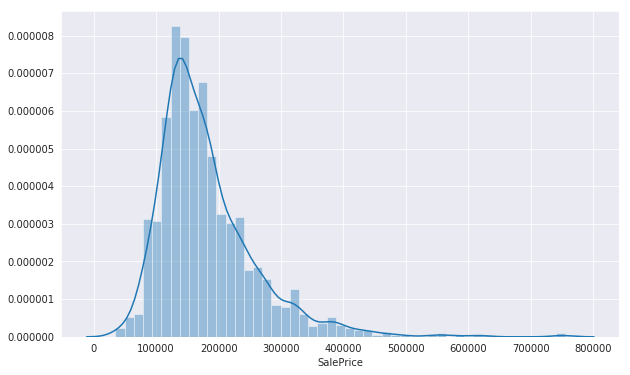

In [0]:
f, ax = plt.subplots(figsize=(10, 6))
sns.distplot(df.SalePrice)
plt.show()

In [0]:
df['SalePrice_Category'] = np.ceil(df["SalePrice"] / 120000)
df.SalePrice_Category.value_counts().sort_index()

1.0    269
2.0    946
3.0    194
4.0     41
5.0      6
6.0      2
7.0      2
Name: SalePrice_Category, dtype: int64

Se crearon 7 categorías. Sin embargo, como se observa en la gráfica anterior, los últimos valores son atípicos. Por lo tanto, se decide que todas las categorías arriba de tres se unirán a esta.

In [0]:
# Las que estén arriba de 3 se unen a la categoría 3
df["SalePrice_Category"].where(df["SalePrice_Category"] < 3, 3.0, inplace=True)
df.SalePrice_Category.value_counts().sort_index()

1.0    269
2.0    946
3.0    245
Name: SalePrice_Category, dtype: int64

Como resultado, se crearon las tres variables de Bajo, Medio y Alto.

##2. Regresión Lineal




### Selección de variables
Utilizando el mismo análisis que se utilizó en el análisis exploratorio, se realizará un análisis de correlación para encontrar las variables más importantes para el análisis.

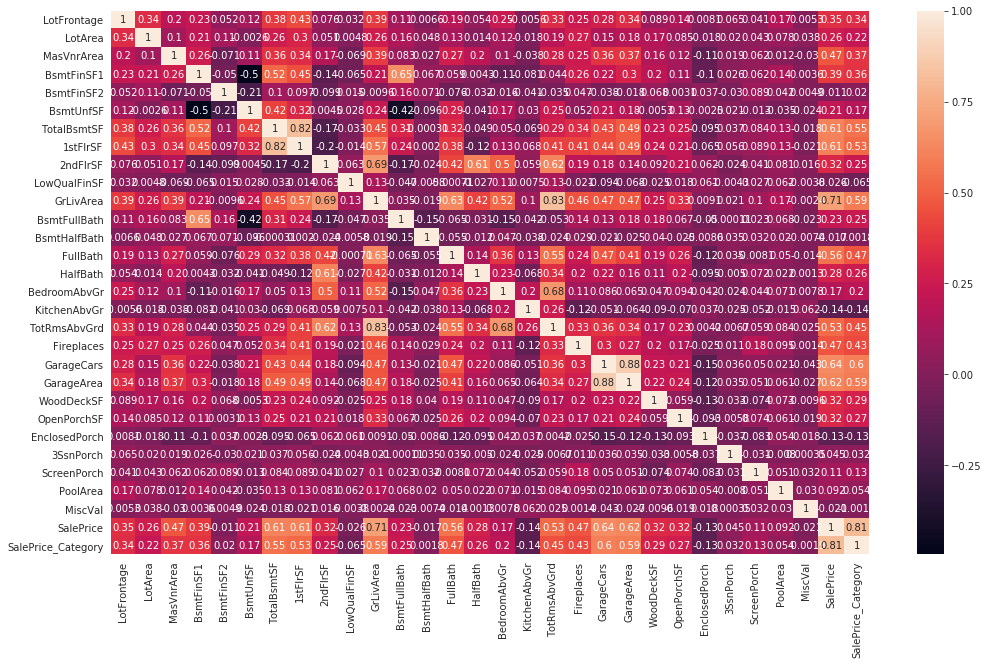

In [0]:
corr = df.corr()
f, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(corr, cbar=True, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Estas son las variables que parecen tener mayor correlación con el precio.
1. GarageArea
3. TotRmsAbvGrd
4. TotalBsmtSF
5. 1stFlrSf
7. MasVnrArea
8. GrLivArea
9. FullBath

GarageArea y GarageCars tienen una correlación de 0.83, esto se debe a que el área del garage define cuántos carros caben dentro de él. Por lo tanto, solo se tomará GarageArea.




### Creando el modelo

Se utilizan las variables con mayor correlación para crear el modelo.



In [0]:
columnas_predictoras = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath']
x = df[columnas_predictoras]
y = df.SalePrice
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=123) 

Se crea el modelo.



In [0]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(linreg.intercept_)
print(linreg.coef_)

-31640.877420419536
[   56.11831596    91.99236417    46.61952422 21293.1919139 ]


### Predicción con el modelo
Se realizará una predicción utilizando el modelo creado.

In [0]:
linreg.predict(x_test)

array([206282.62484663, 233209.82963236, 187253.34409149, 233911.59612382,
       146142.07725388, 226089.59131384, 285481.54125157, 109996.90643724,
       174756.82512899, 104718.69549654, 157089.87021917, 207290.74573347,
       144901.21205548, 114645.49623729, 226909.70608528, 177970.55814491,
       119947.28641756, 257258.05793267, 203706.78349072, 157082.77536065,
       140254.48556421, 191685.79659883, 105510.59069818, 132927.87548061,
       215431.28915273, 164174.59389671, 210365.92993466, 190330.87232387,
       135821.04365416, 162126.8325687 , 140744.31292704, 201811.47698938,
       180410.3255427 , 204976.44795777, 261288.08559219, 217487.91425801,
       167217.9358502 , 342301.78960487, 179488.54080657, 103201.91224312,
       124785.45769119, 222933.05483496, 181505.3001646 , 173677.55318689,
       224195.48702541, 113492.57740707, 260577.01680038, 203085.62206795,
       227239.7199178 , 117539.06502673, 189862.24626261, 202524.36092819,
       141687.56878192, 1

### Análisis de la predicción del modelo utilizando RMSE
Se utilizará el RMSE para verificar la calidad del modelo contra los valores reales. Este criterio mide la diferencia entre los precios reales y los predichos.

In [0]:
mse = mean_squared_error(y_test, linreg.predict(x_test))

In [0]:
print(np.sqrt(mse))

43436.00382214862


In [0]:
print(linreg.score(x_test,y_test))

0.693274241878693


El modelo tiene un valor de R cuadrado alto. Este indica qué porcentaje de las casas ha podido predecir con certeza.

### Variables más importantes
Las variables que resultaron ser más significativas para el modelo fueron: 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath'.

Estas variables resultaron ser las más importantes debido a que eran las que más afectaban el RSME del modelo. Lo que define a estas variables es la correlación que tienen con el precio de la casa, todas ellas presentaron más de 0.6.




### Conclusión de modelo
Es un modelo de mediana calidad, predice solamente el 70% de los precios de las casas.

## K Nearest Neighbors
Este algoritmo se utiliza para estimar variables continuas. Y utiliza la media de sus 'k' vecinos más cercanos.

### Creación de variable categórica para la variable que se utilizará para estretificación
Se quiere utilizar una variable para realizar el sampleo estratificado. Para ello se utilizará el resultado de la correlación realizada en secciones anteriores.

In [0]:
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice             1.000000
SalePrice_Category    0.808884
GrLivArea             0.708624
GarageCars            0.640409
GarageArea            0.623431
TotalBsmtSF           0.613581
1stFlrSF              0.605852
FullBath              0.560664
TotRmsAbvGrd          0.533723
MasVnrArea            0.472614
Fireplaces            0.466929
BsmtFinSF1            0.386420
LotFrontage           0.349876
WoodDeckSF            0.324413
2ndFlrSF              0.319334
OpenPorchSF           0.315856
HalfBath              0.284108
LotArea               0.263843
BsmtFullBath          0.227122
BsmtUnfSF             0.214479
BedroomAbvGr          0.168213
ScreenPorch           0.111447
PoolArea              0.092404
3SsnPorch             0.044584
BsmtFinSF2           -0.011378
BsmtHalfBath         -0.016844
MiscVal              -0.021190
LowQualFinSF         -0.025606
EnclosedPorch        -0.128578
KitchenAbvGr         -0.135907
Name: SalePrice, dtype: float64

Como se observa en el resultado anterior, la variable más correlacionada con el precio es GrLivArea. Por lo tanto nos interesa para realizar nuestra estratificación.

Se procede a análizar la variable GrLivArea para decidir cuántas categorías debería tener.

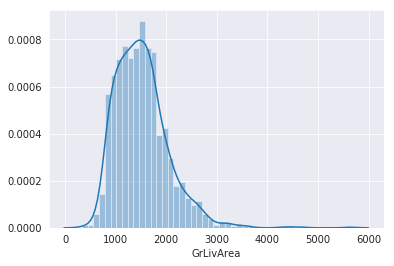

In [0]:
sns.distplot(df.GrLivArea)
plt.show()

De la gráfica anterior, se observa que la mayoría de valores de GrLivArea se encuentran entre 1000 y 2000, y luego se tiene una cola hacia la derecha.

Ahora se procede a la creación de las categorías para dicha variable.

In [0]:
df['GrLivArea_Category'] = np.ceil(df["GrLivArea"] / 500)
df.GrLivArea_Category.value_counts().sort_index()

1.0       3
2.0     228
3.0     554
4.0     461
5.0     144
6.0      52
7.0      12
8.0       2
9.0       2
10.0      1
12.0      1
Name: GrLivArea_Category, dtype: int64

Sin embargo, nos interesa tener menos categorías, ya que las últimas ya casi no tienen casas en ellas.



In [0]:
# Las que estén arriba de 5 se unen a la categoría 5
df["GrLivArea_Category"].where(df["GrLivArea_Category"] < 5, 5.0, inplace=True)
df.GrLivArea_Category.value_counts().sort_index()

1.0      3
2.0    228
3.0    554
4.0    461
5.0    214
Name: GrLivArea_Category, dtype: int64

### Muestreo estratificado
Para este modelo se utilizará un tipo de muestreo diferente al utilizado para regresión lineal. Las ventajas del muestreo estratificado es que si un subgrupo de casas no se encuentra correctamente representado, podría alterar las predicciones. 

In [0]:
df = df.select_dtypes(exclude=['category'])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in split.split(df, df["GrLivArea_Category"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
strat_test_set.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_Category,GrLivArea_Category
608,78.0,12168,0.0,428,0,537,965,1940,1254,0,3194,0,0,2,1,4,1,10,2,2,380,0,0,0,0,0,0,0,359100,3.0,5.0
294,80.0,9600,238.0,1285,0,131,1416,1644,0,0,1644,1,0,1,0,3,1,7,2,2,418,110,0,0,0,0,0,0,167000,2.0,4.0
392,73.0,8339,0.0,0,0,0,0,882,0,0,882,0,0,1,0,3,1,5,0,1,294,0,0,0,0,0,0,1200,106500,1.0,2.0
1254,60.0,6931,92.0,0,0,746,746,760,896,0,1656,0,0,2,1,3,1,7,1,2,397,178,128,0,0,0,0,0,165400,2.0,4.0
273,80.0,9600,183.0,620,620,0,1240,1632,0,0,1632,1,0,2,0,3,1,6,1,1,338,289,0,0,0,0,0,0,139000,2.0,4.0


### Creación del modelo
Ahora se diseñará el modelo, primero se elegirán las variables más significativas.

In [0]:
# Entrenamiento
strat_train_set
# Prueba
strat_test_set

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,SalePrice_Category,GrLivArea_Category
608,78.0,12168,0.0,428,0,537,965,1940,1254,0,3194,0,0,2,1,4,1,10,2,2,380,0,0,0,0,0,0,0,359100,3.0,5.0
294,80.0,9600,238.0,1285,0,131,1416,1644,0,0,1644,1,0,1,0,3,1,7,2,2,418,110,0,0,0,0,0,0,167000,2.0,4.0
392,73.0,8339,0.0,0,0,0,0,882,0,0,882,0,0,1,0,3,1,5,0,1,294,0,0,0,0,0,0,1200,106500,1.0,2.0
1254,60.0,6931,92.0,0,0,746,746,760,896,0,1656,0,0,2,1,3,1,7,1,2,397,178,128,0,0,0,0,0,165400,2.0,4.0
273,80.0,9600,183.0,620,620,0,1240,1632,0,0,1632,1,0,2,0,3,1,6,1,1,338,289,0,0,0,0,0,0,139000,2.0,4.0
1187,89.0,12461,0.0,1456,0,168,1624,1624,0,0,1624,1,0,2,0,2,1,5,1,3,757,0,114,192,0,0,0,0,262000,3.0,4.0
279,83.0,10005,299.0,392,0,768,1160,1156,866,0,2022,0,0,2,1,4,1,8,1,2,505,288,117,0,0,0,0,0,192000,2.0,5.0
1285,50.0,6000,0.0,0,0,780,780,825,587,0,1412,0,0,1,0,4,1,6,1,1,280,45,0,0,0,0,0,0,132500,2.0,3.0
742,65.0,8450,108.0,0,0,1349,1349,1349,0,0,1349,0,0,2,0,3,1,6,0,2,539,120,55,0,0,0,0,0,179000,2.0,3.0
758,24.0,2280,360.0,549,0,195,744,757,744,0,1501,0,0,2,1,3,1,6,0,2,440,0,0,0,0,0,0,0,179400,2.0,4.0


### KNN

In [70]:
input_feature = strat_train_set.columns.values.tolist()
train_X = strat_train_set.as_matrix(columns = input_feature)
scaler = preprocessing.StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X = strat_test_set.as_matrix(columns = [input_feature])
test_X_scaled = scaler.transform(test_X)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X_scaled, strat_train_set.as_matrix(columns = ['SalePrice'])) 
pred = knn.predict(train_X_scaled)
print(pred)

[140000 185000 262280  79900 252678 185500 188000 169990 128000 129000
 127000 155000 163500 124000 148000 325000 148000 173900 277500 129000
 137000 152000 213250 285000  78000 159895 254000 180000  81000 214000
 134000 185900 127500  78000 172500 167000 107000  52000 106250 179500
 268000 168000 214000 192500 199900 141000  40000 127000 305000 272000
 280000 255900 100000 140000 158000 143000 127000 132250 172500 337000
 277500 125500 205000 132500 135000  98000 150500 248000 104000 185900
 163990 118500 133900 128200 150000 140000 185000  82500 119000 118000
 394432 160000 135000 124500 134450 229456 179665  99500 193000 140000
 260400 100000 239000 156500 152000 129900 320000 129500 260000 250000
 127500 132500 129500 213250 177500  82500 155000 152000 200000 124000
  78000 102776  91000 165000 163990 136900 127000 131500 174000 264561
 146000 108000 410000 171000 124500 335000 256000 130250 170000 171000
  82500 122000 252678 187000 169000 165000 150000 192500 172500 179665
 10740

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### Matriz de Confusión

In [0]:
test_X_scaled.shape
pred.shape
#confusion_matrix(test_X_scaled, pred)

(870,)

#### Probando el Algoritmo con los datos de Kaggle


In [0]:
trainDfNumerical = train_df.select_dtypes(exclude=['category'])

input_feature = trainDfNumerical.columns.values.tolist()
trainX = trainDfNumerical.as_matrix(columns = input_feature)
scaler = preprocessing.StandardScaler().fit(trainX)
trainX = scaler.transform(trainX)
testX = strat_test_set.as_matrix(columns = [input_feature])
testXScaled = scaler.transform(testX)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(trainX, train_df.as_matrix(columns = ['SalePrice'])) 
pred = knn.predict(trainX)
print(pred)

[175000 173000 104900 143000 196500 129900 118000 127000 125000 255500
  73000 139000 153500 135000 123000 255500  95000 285000 165000  68500
  40000 176485 165500 207000 248000 144000 109000  82000 143000 158500
 137000 221500 127000 131000 114500 110000 256000 153500  40000 130000
 219500 290000 180000 204000  80000 159000 244000 129500 129900 109500
  68400 258000 144152 118500  72500 133900 193000 165600 214000  94750
  83000 157500 178000  93500 169500  67000  80000 115000 190000 104900
 250000 155000 244000 140000 100000 112000 140000 176000  79500 128000
 145000 185000 173000 132000 200000 132000 204000 130000 105000 118500
 107000 306000 207500 239900  85500 100000 185000 187500 224000 150000
 202500 172000 155000 374000  68400 155000 192500 124500 115000 173000
 108959 197000 239000 184000 192000 130000 100000 148500 171000 140000
 171500 112000 144500  66500 244000 176485 215000  96500 179900 256300
  75000 178740 118400  75000 210000 179000 194500 275000 113000 226000
  7900

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


#### Matriz de Confusión con datos de Kaggle

## Validación cruzada

### Regresión Lineal


## Comparación de modelos